# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [5]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, color

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


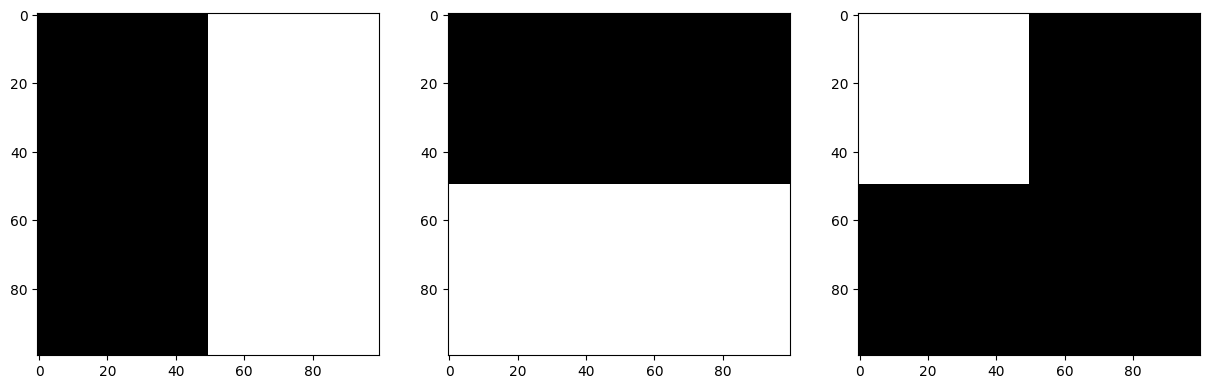

In [6]:
# solution

arr_1, arr_2, arr_3 = np.zeros((3, 100, 100))
arr_1[:, 50:] = 255
arr_2[50:, :] = 255
arr_3[:50, :50] = 255

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(arr_1, cmap='gray')
ax[1].imshow(arr_2, cmap='gray')
ax[2].imshow(arr_3, cmap='gray')

*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


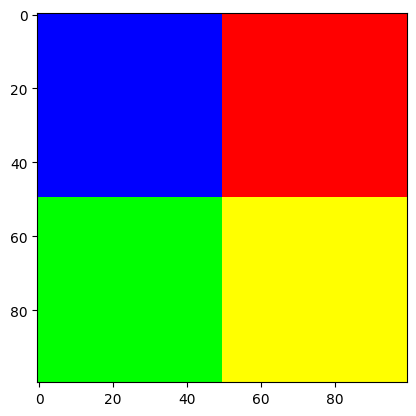

In [7]:
# solution
arr_rgb = np.zeros((100, 100, 3))
arr_rgb[:, :, 0] = arr_1
arr_rgb[:, :, 1] = arr_2
arr_rgb[:, :, 2] = arr_3
plt.imshow(arr_rgb)


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using matplotlib subplot.



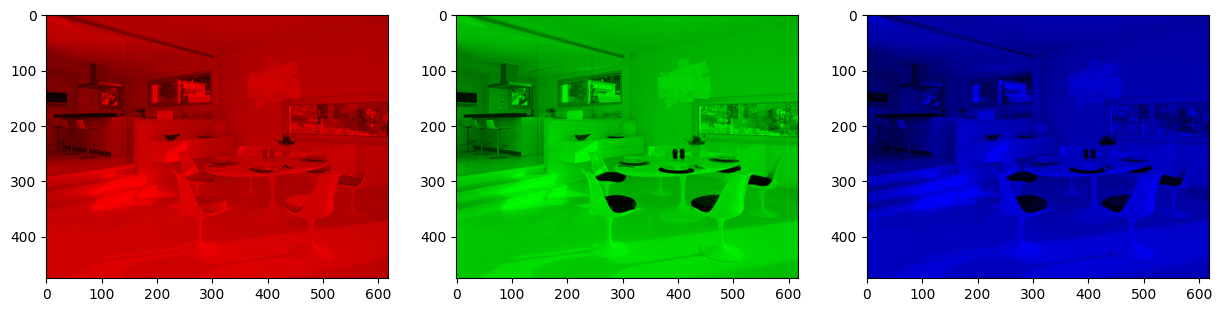

In [8]:
# solution
sillas = plt.imread('notebook_images/sillas.jpg', format='jpg')
red = sillas.copy()
red[:, :, 1] = 0
red[:, :, 2] = 0

green = sillas.copy()
green[:, :, 0] = 0
green[:, :, 2] = 0

blue = sillas.copy()
blue[:, :, 0] = 0
blue[:, :, 1] = 0

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(red)
ax[1].imshow(green)
ax[2].imshow(blue)

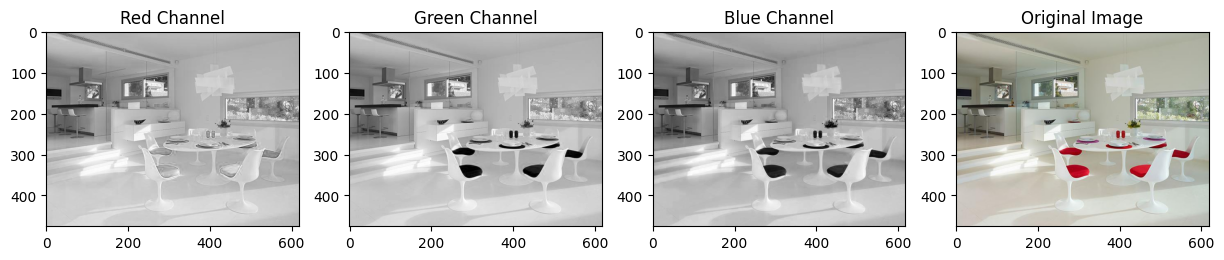

In [9]:
# solution 2: Extract the 3 channels and plot them separately
# as black and white images
mg = io.imread("images/sillas.jpg")

# Split the image into its channels
red_channel = mg[:,:,0]
green_channel = mg[:,:,1]
blue_channel = mg[:,:,2]

# Plot the channels
fig, axarr = plt.subplots(ncols=4, nrows=1, figsize=(15,15))
axarr[0].imshow(red_channel, cmap='gray')
axarr[0].set_title('Red Channel')
axarr[1].imshow(green_channel, cmap='gray')
axarr[1].set_title('Green Channel')
axarr[2].imshow(blue_channel, cmap='gray')
axarr[2].set_title('Blue Channel')
axarr[3].imshow(mg)
axarr[3].set_title('Original Image')


plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

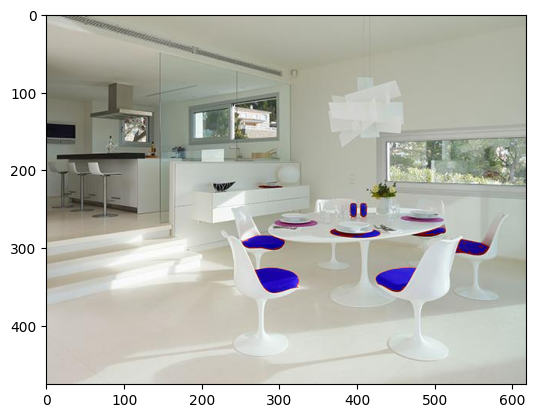

In [5]:
# solution 1: Set thresholds for each color channel
# This solution is better than just switching channels because it 
# allows to keep better the original colors 

TRESH = 128
LOWER_THRESH = 80
sillas_toblue = sillas.copy()
red = sillas_toblue[:, :, 0]
green = sillas_toblue[:, :, 1]
blue = sillas_toblue[:, :, 2]
# sillas_toblue = np.where(sillas_toblue[:, :, 0] > 200, np.array(), , sillas_toblue[:, :, 0])
red_new = red.copy()
mask_red = np.where((red > TRESH)&(green<LOWER_THRESH)&(blue<LOWER_THRESH))
red_new[mask_red] = blue[mask_red]
blue_new = blue.copy()
blue_new[mask_red] = red[mask_red]
# red[red > TRESH] = blue

sillas_toblue[:, :, 0] = red_new
sillas_toblue[:, :, 2] = blue_new

plt.imshow(sillas_toblue)

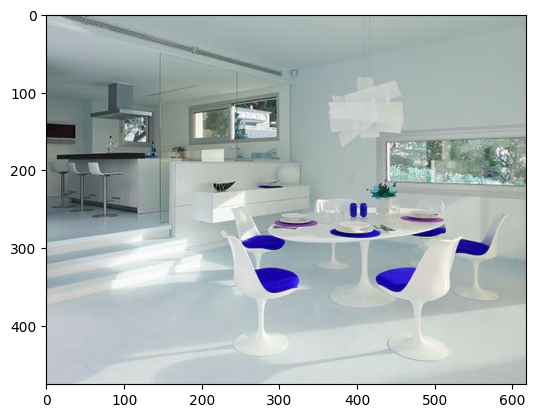

In [6]:
# solution 2: Exchange the blue and red channels

sillas_toblue = sillas.copy()
red = sillas_toblue[:, :, 0]
green = sillas_toblue[:, :, 1]
blue = sillas_toblue[:, :, 2]

red_new = blue.copy()
blue_new = red.copy()

sillas_toblue[:, :, 0] = red_new
sillas_toblue[:, :, 2] = blue_new

plt.imshow(sillas_toblue)

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


Model Shape: (1188, 915, 3)
Coat Shape: (1188, 915, 3)
Texture 1: (183, 275, 3)
Texture 2: (1188, 915, 3)
Texture 3: (350, 350, 3)
Reshaped Texture 1: (1188, 915, 3)
Reshaped Texture 3: (1188, 915, 3)


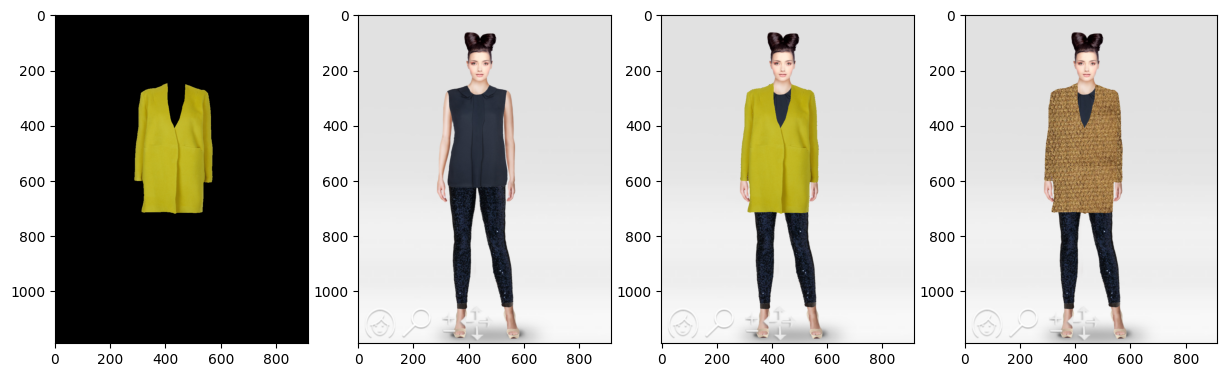

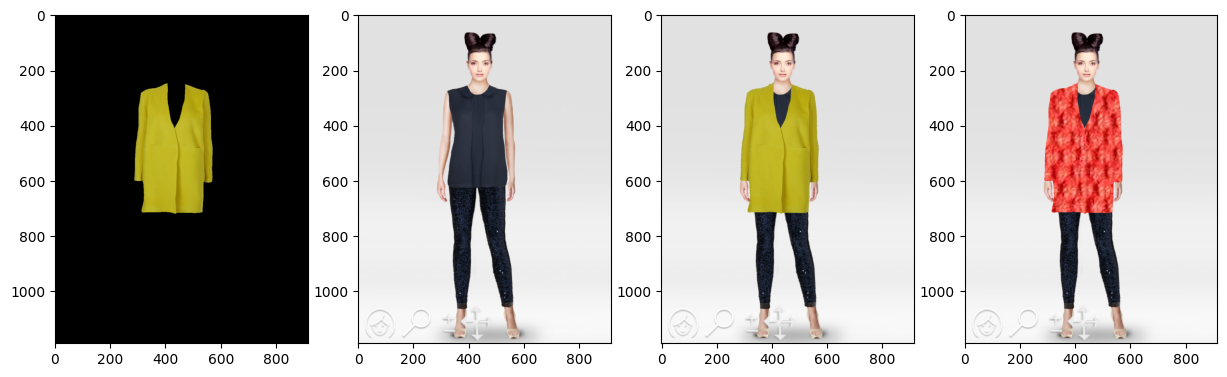

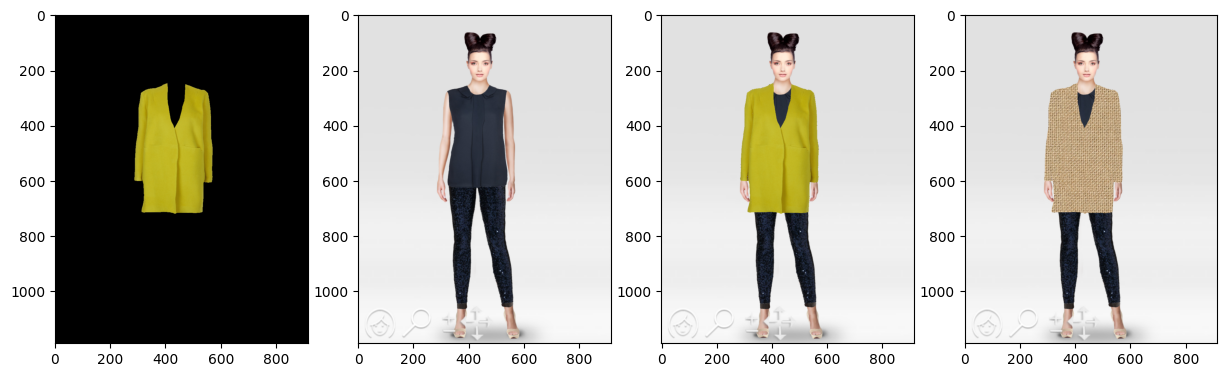

In [7]:
# solution

# Read the base images without the alpha channel (PNGs)
coat = plt.imread('images/coat.png', format='png')[:, :, :3]
model = plt.imread('images/model.png', format='png')[:, :, :3]

print(f"Model Shape: {model.shape}")
print(f"Coat Shape: {coat.shape}")

model_w_coat = model.copy()
model_w_coat[coat > 0] = coat[coat > 0]

# Add the different textures
# NOTE: There's something wrong with the file extensions. 
#       textures 1 and 2 are jpg files with .png extension
texture1 = plt.imread('images/texture.png', format='jpg') / 255. # JPG -> 3 channels [0, 255]
texture2 = plt.imread('images/texture2.png', format='png')[:, :, :3] # PNG -> 4 channels [0., 1.]
texture3 = plt.imread('images/texture3.jpg', format='jpg') / 255. 

print(f"Texture 1: {texture1.shape}")
print(f"Texture 2: {texture2.shape}")
print(f"Texture 3: {texture3.shape}")

# Put the coat on the model was easy because the
# array shapes where the same. This is not the case 
# for the 1st and 3rd textures.

# Reshape the 1st texture to be, at least, as big as the original
x1_ratio = coat.shape[0] // texture1.shape[0] + 1
y1_ratio = coat.shape[1] // texture1.shape[1] + 1

reshaped_tx1 = np.tile(texture1, [x1_ratio, y1_ratio, 1])[:coat.shape[0], :coat.shape[1], :]
print(f"Reshaped Texture 1: {reshaped_tx1.shape}")
# Reshape the 3rd texture to be, at least, as big as the original
x3_ratio = coat.shape[0] // texture3.shape[0] + 1
y3_ratio = coat.shape[1] // texture3.shape[1] + 1

reshaped_tx3 = np.tile(texture3, [x3_ratio, y3_ratio, 1])
reshaped_tx3 = np.tile(texture3, [x3_ratio, y3_ratio, 1])[:coat.shape[0], :coat.shape[1], :]
print(f"Reshaped Texture 3: {reshaped_tx3.shape}")

# Change the textures
model_w_tx1 = model_w_coat.copy()
model_w_tx1 = np.where(coat>0, reshaped_tx1, model_w_tx1) 

model_w_tx2 = model_w_coat.copy()
model_w_tx2 = np.where(coat>0, texture2, model_w_tx2)

model_w_tx3 = model_w_coat.copy()
model_w_tx3 = np.where(coat>0, reshaped_tx3, model_w_tx3)

# Overlap pictures to see the result
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(coat)
ax[1].imshow(model)
ax[2].imshow(model_w_coat)
ax[3].imshow(model_w_tx1)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(coat)
ax[1].imshow(model)
ax[2].imshow(model_w_coat)
ax[3].imshow(model_w_tx2)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(coat)
ax[1].imshow(model)
ax[2].imshow(model_w_coat)
ax[3].imshow(model_w_tx3)

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




Text(0.5, 1.0, 'Histogram of intensities')

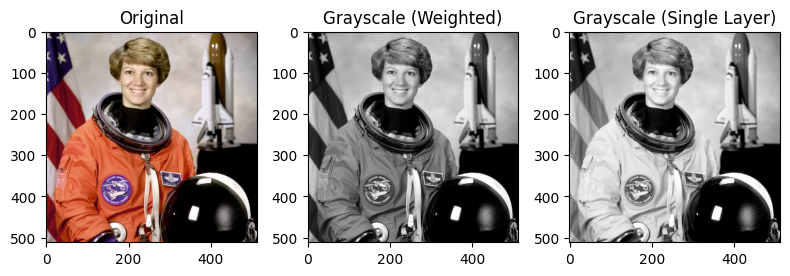

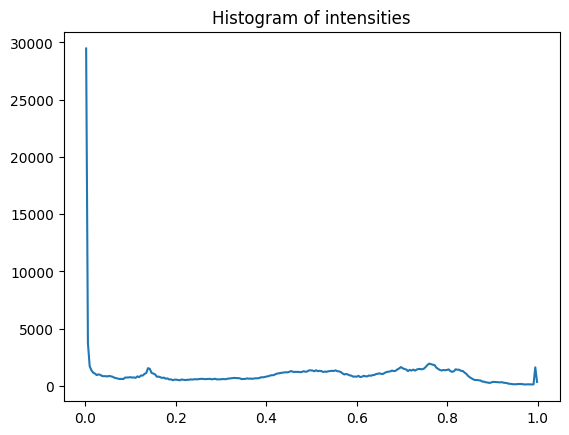

In [50]:
# solution
# 
# The value of each grayscale pixel is calculated as the weighted sum 
# of the corresponding red, green and blue pixels as:
# Y = 0.2125 R + 0.7154 G + 0.0721 B
# These weights are used by CRT phosphors as they better represent human
# perception of red, green and blue than equal weights.

original = data.astronaut()
grayscale = color.rgb2gray(original) 
grayscale_single_channel = original[:, :, 0]

fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale (Weighted)")
ax[2].imshow(grayscale_single_channel, cmap=plt.cm.gray)
ax[2].set_title("Grayscale (Single Layer)")

fig.tight_layout()

fig, ax = plt.subplots(1, 1)
hist = exposure.histogram(grayscale)
ax.plot(hist[1], hist[0])
ax.set_title("Histogram of intensities")

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

<BarContainer object of 8 artists>

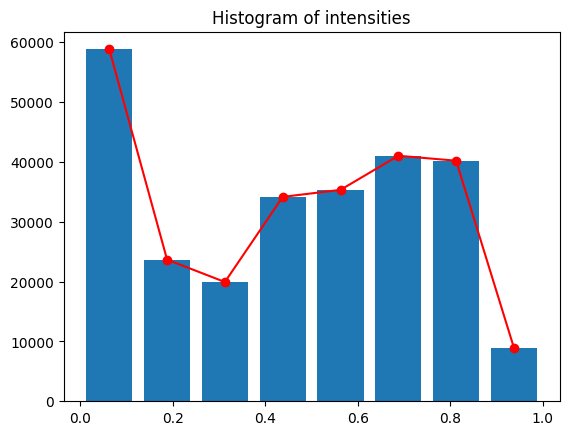

In [57]:
# solution

fig, ax = plt.subplots(1, 1)
hist = exposure.histogram(grayscale, nbins=8)
ax.plot(hist[1], hist[0], 'ro-')
ax.set_title("Histogram of intensities")
ax.bar(hist[1], hist[0], width=.1)



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

Yes, it does. When the bin count is reduced, the granularity is lower and the spectrum of grays. In this case, got reduced to 8 different types of gray. 

There are different rules to determine the number of bins of a histogram but the main goal is being able to understand the result of our analysis. 

- If the number of bins is **too high**, then a lot of noise is taken in account and the bins don't contain a significant amount of data to be interpreted.

- If it's **too low**, then some information can be lost or masked by the rest of the instances. The histogram is not able to capture the total distribution of the image, so we are losing details and the curve can be smoothed

A typical way to estimate the amount of bins needed is just taking the squared root of the number of pixels in the image.

$$
N_{bins} = \sqrt{N_{pixels}}
$$


N_bins =  334


<BarContainer object of 334 artists>

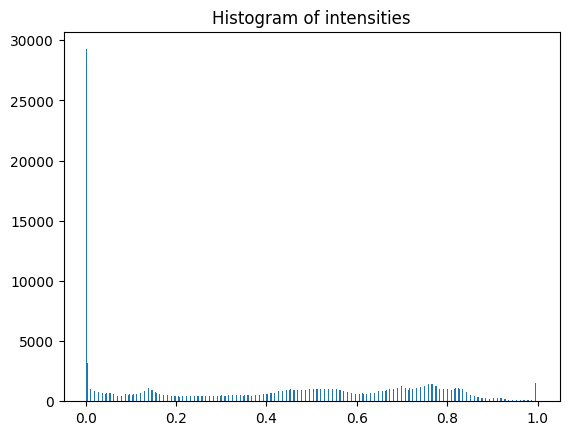

In [87]:
n_bins = int(np.sqrt(len(np.unique(grayscale))))
print("N_bins = ", n_bins)

fig, ax = plt.subplots(1, 1)
hist = exposure.histogram(grayscale, nbins=n_bins)
ax.set_title("Histogram of intensities")
ax.bar(hist[1], hist[0], width=.001)


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


/home/alberto/Documentos/GitHub/UPC_MasterArtificialIntelligence/.venv/lib/python3.10/site-packages/skimage/_shared/utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


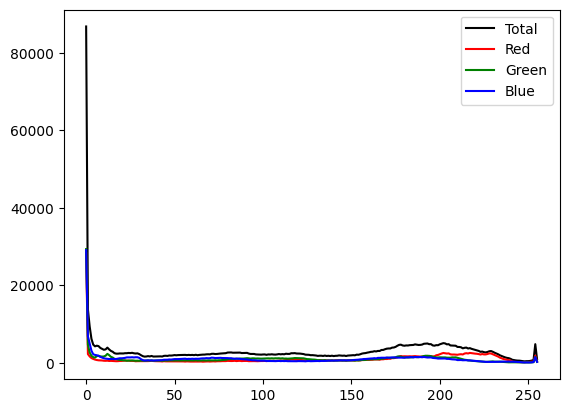

In [89]:
#solution

total_hist = exposure.histogram(original)
hist_r, hist_g, hist_b = [exposure.histogram(original[:, :, i]) for i in range(3)]

plt.plot(total_hist[1], total_hist[0], label="Total", color="k")
plt.plot(hist_r[1], hist_r[0], label="Red", color="r")
plt.plot(hist_g[1], hist_g[0], label="Green", color="g")
plt.plot(hist_b[1], hist_b[0], label="Blue", color="b")
plt.legend();

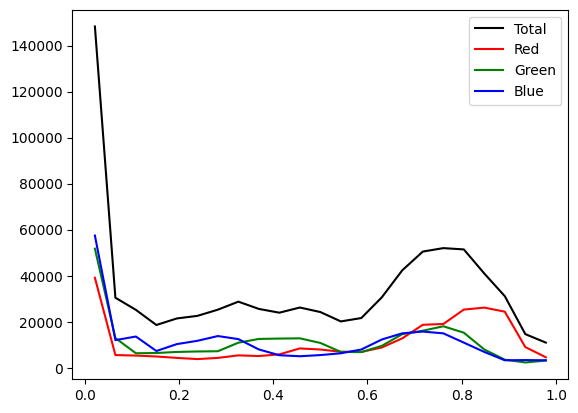

In [90]:
total_hist = exposure.histogram(original / 255., nbins=23)
hist_r, hist_g, hist_b = [exposure.histogram(original[:, :, i] / 255., nbins=23) for i in range(3)]

plt.plot(total_hist[1], total_hist[0], label="Total", color="k")
plt.plot(hist_r[1], hist_r[0], label="Red", color="r")
plt.plot(hist_g[1], hist_g[0], label="Green", color="g")
plt.plot(hist_b[1], hist_b[0], label="Blue", color="b")
plt.legend();

Black line is above because its frequence is the sum of the frequences of the 3 channels

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



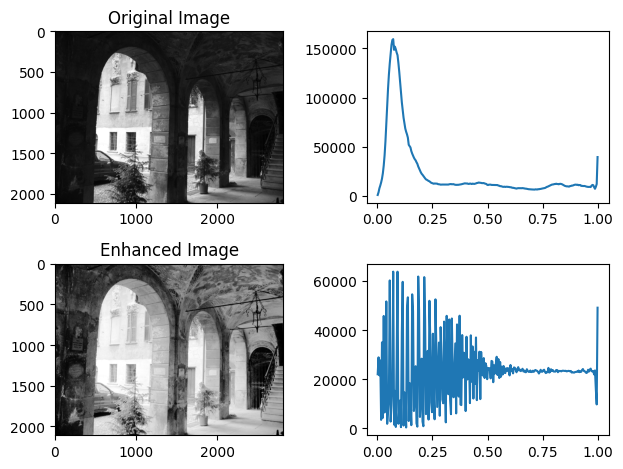

In [98]:
# solution

aqua = io.imread('images/aquatermi_lowcontrast.jpg')
aqua = color.rgb2gray(aqua)
hist_aqua = exposure.histogram(aqua)

eq_aqua = exposure.equalize_hist(aqua)
hist_eq_aqua = exposure.histogram(eq_aqua)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(aqua, cmap="gray")
ax[0, 1].plot(hist_aqua[1], hist_aqua[0])
ax[0, 0].set_title("Original Image")
ax[1, 0].imshow(eq_aqua, cmap="gray")
ax[1, 1].plot(hist_eq_aqua[1], hist_eq_aqua[0])
ax[1, 0].set_title("Enhanced Image")
fig.tight_layout()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Linear stretch is a straight-forward method of contrast enhancement that gives fair results when the input image has a narrow histogram that has a distribution close to being uniform. It is a simple grey scale transformation in which the lowest input DN of interest becomes zero and the highest DN of interest becomes 255.

As the name suggests, histogram equalization aims at achieving a more uniform distribution in the histogram. Histogram equalization is a non-linear transformation; It effectively spreads out the most frequent intensity values, i.e. stretching out the intensity range of the image. This method usually increases the global contrast of images when its usable data is represented by close contrast values.


### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



<BarContainer object of 256 artists>

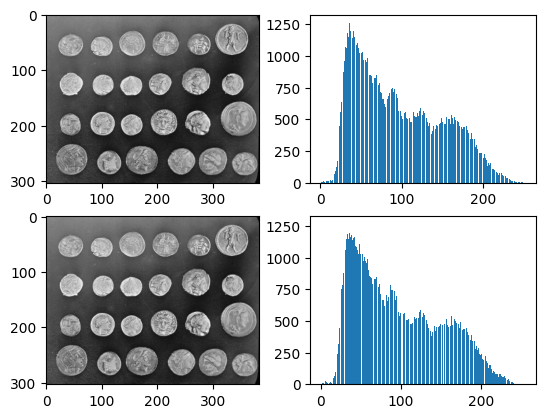

In [117]:
# solution

def rescale(arr, min, max):
    '''
    Linear function that transforms to the interval [min, max]
    '''
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr)) * max + min

def lcs(image, bin_count=256):
    min_goal = 0 # The minimum value of intensity desired
    max_goal = bin_count - 1 # Maximum value of intensity
    new_image = rescale(image, min_goal, max_goal)

    return new_image

coins = data.coins()

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(coins, cmap="gray")
hist_orig = exposure.histogram(coins)
ax[0, 1].bar(hist_orig[1], hist_orig[0])

trans = lcs(coins, bin_count=256)
ax[1, 0].imshow(trans, cmap="gray")
hist_trans = exposure.histogram(trans)
ax[1, 1].bar(hist_trans[1], hist_trans[0])

With this function, the shape of the histogram is not changing. If we want to have an stretch, it is fundamental to zoom in the intensities.

Usually, percentiles 1 and 99 are taken as new min value and max values.

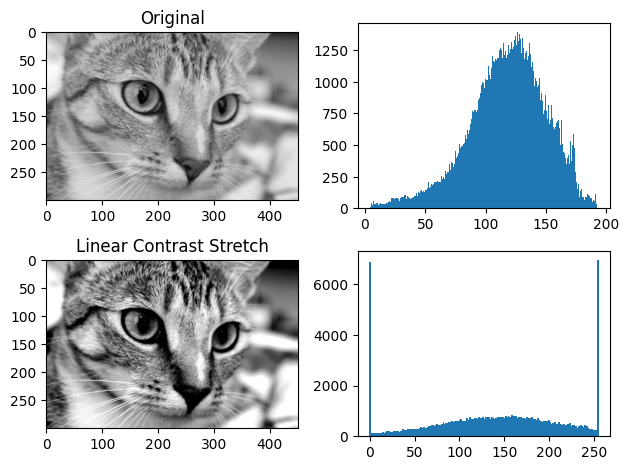

In [187]:
def rescale_pct(arr, min, max):
    '''
    Linear function that transforms to the interval [min, max]
    '''
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr)) * max + min

def lcs(image, pct1=0., pct2=100., bin_count=256):
    min_goal = 0 # The minimum value of intensity desired
    max_goal = bin_count - 1 # Maximum value of intensity

    min_img = np.percentile(image, pct1)
    max_img = np.percentile(image, pct2)

    new_image = image.copy()
    new_image = np.where(new_image < min_img, min_img, new_image)
    new_image = np.where(new_image > max_img, max_img, new_image)

    new_image = rescale(new_image, min_goal, max_goal)

    return new_image

img = data.cat()
if img.ndim > 2:
    img = color.rgb2gray(img) * 256

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap="gray")
ax[0, 0].set_title("Original")
hist_orig = exposure.histogram(img, nbins=256)
ax[0, 1].bar(hist_orig[1], hist_orig[0])

trans = lcs(img, pct1=5, pct2=95, bin_count=256)
ax[1, 0].imshow(trans, cmap="gray")
ax[1, 0].set_title("Linear Contrast Stretch")
hist_trans = exposure.histogram(trans, nbins=256)
ax[1, 1].bar(hist_trans[1], hist_trans[0], width=2)
fig.tight_layout()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




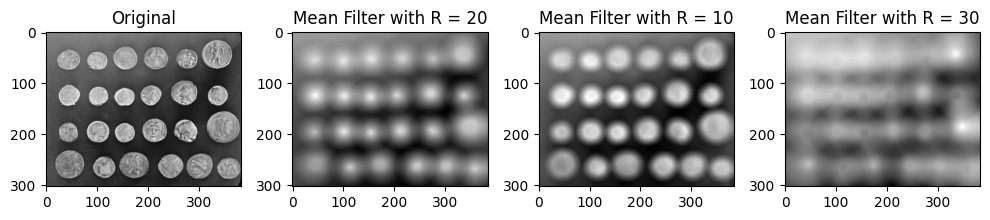

In [10]:
# solution
R = 20
coins = data.coins()
selem = morphology.disk(R)
img_r = filters.rank.mean(coins, selem)

R_m_10 = R - 10
selem_m_10 = morphology.disk(R_m_10)
img_r_m_10 = filters.rank.mean(coins, selem_m_10)

R_p_10 = R + 10
selem_p_10 = morphology.disk(R_p_10)
img_r_p_10 = filters.rank.mean(coins, selem_p_10)

fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(coins, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(img_r, cmap='gray')
ax[1].set_title(f"Mean Filter with R = {R}")
ax[2].imshow(img_r_m_10, cmap='gray')
ax[2].set_title(f"Mean Filter with R = {R_m_10}")
ax[3].imshow(img_r_p_10, cmap='gray')
ax[3].set_title(f"Mean Filter with R = {R_p_10}")
fig.tight_layout()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

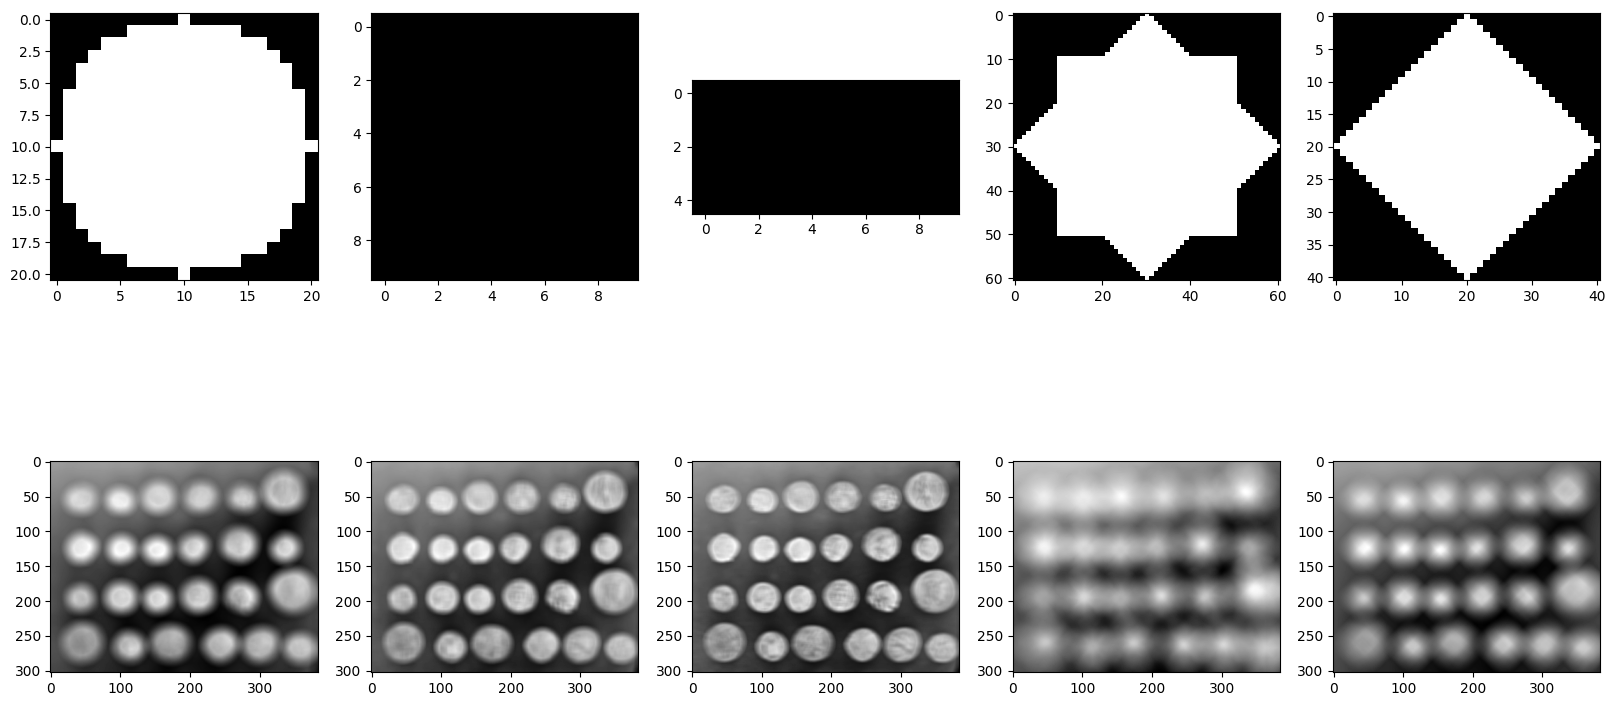

In [216]:
# solution

image = data.coins()

f, ax = plt.subplots(ncols=5, nrows=2,figsize=(20, 10))

selem = morphology.disk(radius=10)
img_fil = filters.rank.mean(image, selem)
ax[0,0].imshow(selem, cmap='gray')
ax[1,0].imshow(img_fil, cmap='gray')

selem = morphology.square(width=10)
img_fil = filters.rank.mean(image, selem)
ax[0,1].imshow(selem, cmap='gray')
ax[1,1].imshow(img_fil, cmap='gray')

selem = morphology.rectangle(ncols=10, nrows=5)
img_fil = filters.rank.mean(image, selem)
ax[0,2].imshow(selem, cmap='gray')
ax[1,2].imshow(img_fil, cmap='gray')

selem = morphology.star(a=20)
img_fil = filters.rank.mean(image, selem)
ax[0,3].imshow(selem, cmap='gray')
ax[1,3].imshow(img_fil, cmap='gray')

selem = morphology.diamond(radius=20)
img_fil = filters.rank.mean(image, selem)
ax[0,4].imshow(selem, cmap='gray')
ax[1,4].imshow(img_fil, cmap='gray')

plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Changing the radius of the disk affects the smoothing functionality in the sense that the bigger the radius is, the more the image is smoothed. This is because as the size of the radius increases, more pixels are taken into account to compute the mean value, so the more the image is blurred. On the other hand, the smaller the radius is, the less the image is smoothed.


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Each geometry, captures the geometric shapes that better suits with it. For example, disk pays attention to rounded forms. Squared, and rectangular selems pay more attention to corners and angles. The shape of the structuring element influences the direction and symmetry of smoothing, as well as the preservation or modification of specific details in the image.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

Mean filter replace each pixel's value with the mean value of its neighborhood. Gaussian filter, on the other hand, uses a weighted average of the pixels in the neighborhood, where the weights are given by a Gaussian kernel. This filter is more effective at removing Gaussian noise, while the mean filter is more effective at removing salt and pepper noise. The Gaussian filter is also more effective at preserving edges than the mean filter, but it is more computationally expensive.

...


---

## **End of P2: Image operators and filters**

Deadline for P2 submission in CampusVirtual is: **Thursday, the 6th of October, 2022**
